# Plot de las predicciones

Pinto las predicciones hechas y veo qué tal se comportan

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [28]:
url = '../output/0.2/^GDAXI/forecast_3m_1net4y.csv'
df = pd.read_csv(url)

# Set the index column to proper pandas.DatatimeIndex type
format = '%Y-%m-%d %H:%M:%S'
df['Datetime'] = pd.to_datetime(df['Date'] + ' 00:00:00', format=format)
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
df = df.drop(columns=['Datetime', 'Date'], axis=1)
df.columns = ['y', 'yhat']

df.head()

,y,yhat
Datetime,,
2015-01-16,10167.769531,9734.515625
2015-01-19,10242.349609,9980.638476
2015-01-20,10257.129883,10171.607910
2015-01-21,10299.230469,10344.160157
2015-01-22,10435.620117,10461.361329


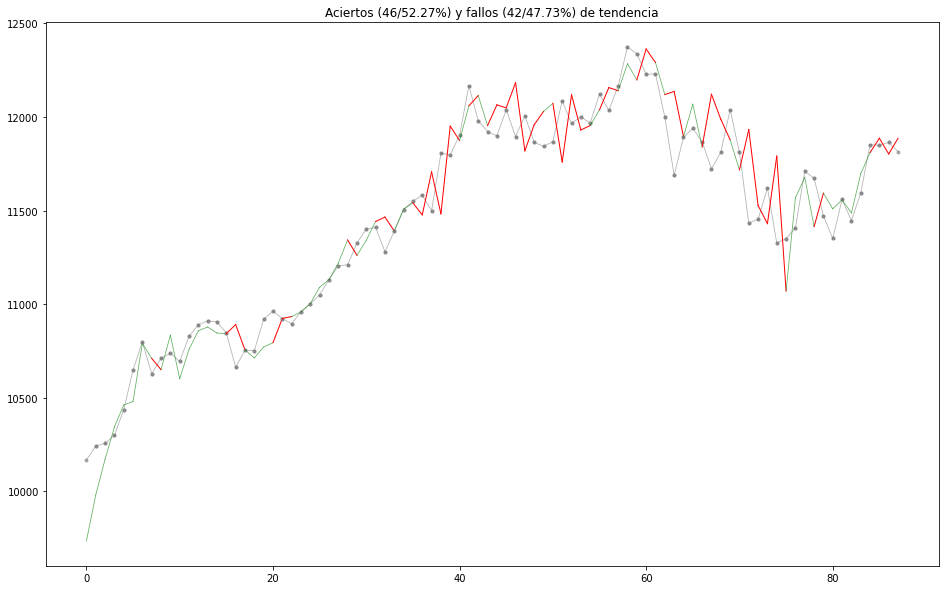

In [34]:
fails = 0
plt.figure(figsize=(16, 10))
for i in range(1, df.shape[0]):
    segment_color='red'
    lw=1.0
    alpha = 1.0
    if i > 0:
        if np.sign(df.iloc[i].y - df.iloc[i-1].y) == np.sign(df.iloc[i]['yhat'] - df.iloc[i-1]['yhat']):
            segment_color='green'
            lw = 0.8
            alpha = 0.6
        else:
            fails += 1

    plt.plot([i-1, i], [df.y.iloc[i-1], df.y.iloc[i]], marker='.', linewidth=0.8, alpha=0.6, color='grey')
    plt.plot([i-1, i], [df.yhat.iloc[i-1], df.yhat.iloc[i]], 
             linewidth=lw, alpha=alpha, color=segment_color)

hits = df.shape[0]-fails
plt.title(f'Aciertos ({hits}/{100*(hits/df.shape[0]):.2f}%) y fallos ({fails}/{100*(fails/df.shape[0]):.2f}%) de tendencia')
plt.show()